![Imagen de WhatsApp 2024-08-15 a las 21.00.58_63b185cc.jpg](<attachment:Imagen de WhatsApp 2024-08-15 a las 21.00.58_63b185cc.jpg>)
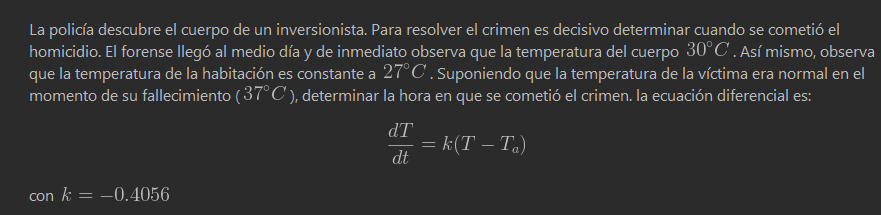

In [13]:
import pandas as pd

class EnfriamientoNewton:
    def __init__(self, T0, Ta, k, h):
        self.T0 = T0
        self.Ta = Ta
        self.k = k
        self.h = h
        self.temperaturas = [T0]
        self.tiempos = [0]
    
    def calcular_temperatura(self, T_prev):
        T_next = T_prev - self.k * self.h * (T_prev - self.Ta)
        return T_next
    
    def simular(self, T_final):
        while self.temperaturas[-1] < T_final:
            T_prev = self.temperaturas[-1]
            T_next = self.calcular_temperatura(T_prev)
            self.temperaturas.append(T_next)
            self.tiempos.append(self.tiempos[-1] + self.h)
        
        data = {
            'Tiempo': self.tiempos,
            'Temperatura': self.temperaturas
        }
        df = pd.DataFrame(data)
        return df
    
    def imprimir_resultados(self, df):
        print(df)

enfriamiento = EnfriamientoNewton(T0=30, Ta=27, k=-0.4056, h=0.5)
resultados = enfriamiento.simular(T_final=37)
enfriamiento.imprimir_resultados(resultados)



   Tiempo  Temperatura
0     0.0    30.000000
1     0.5    30.608400
2     1.0    31.340184
3     1.5    32.220373
4     2.0    33.279064
5     2.5    34.552459
6     3.0    36.084097
7     3.5    37.926352


![Imagen de WhatsApp 2024-08-15 a las 18.00.07_67c00f91.jpg](<attachment:Imagen de WhatsApp 2024-08-15 a las 18.00.07_67c00f91.jpg>)
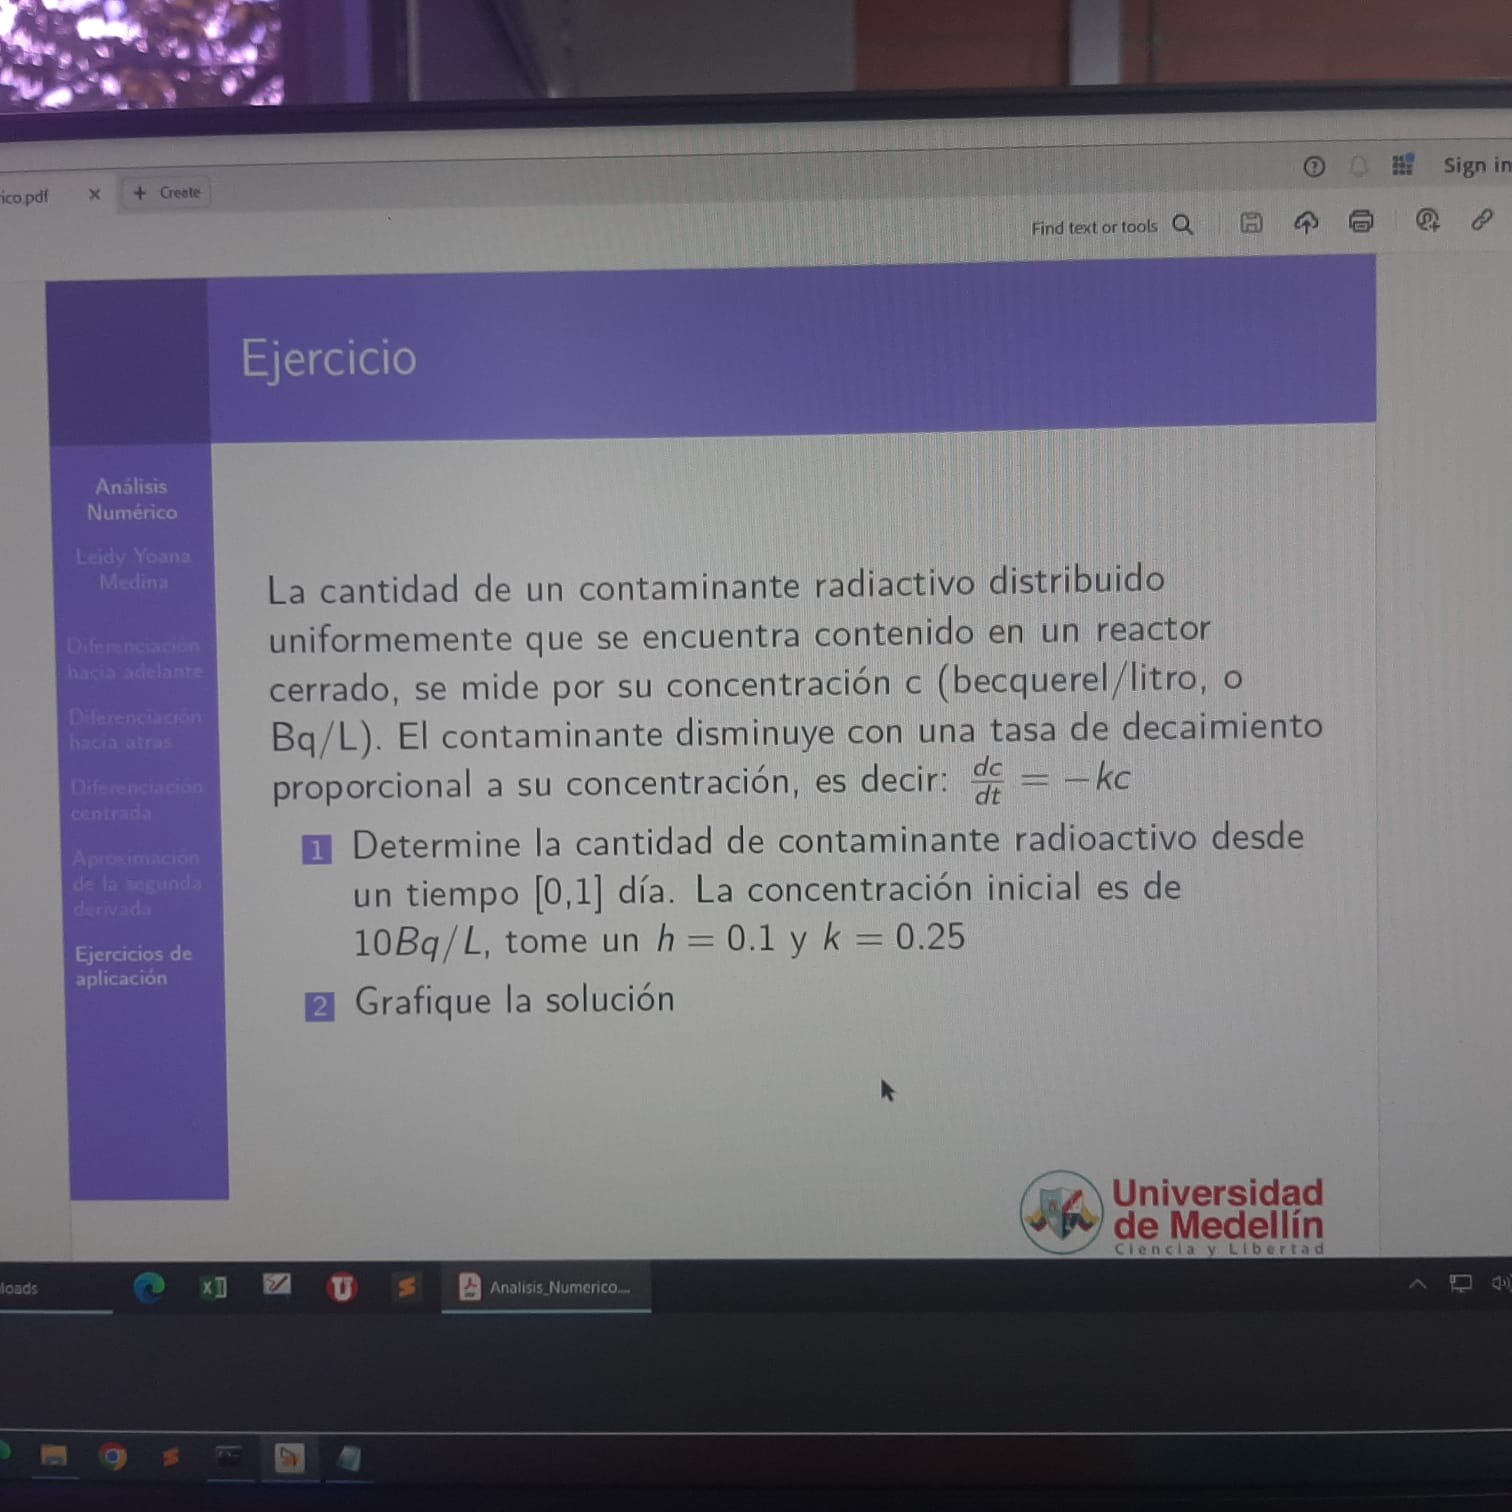

    Tiempo  Concentración
0      0.1      10.000000
1      0.2       9.750000
2      0.3       9.506250
3      0.4       9.268594
4      0.5       9.036879
5      0.6       8.810957
6      0.7       8.590683
7      0.8       8.375916
8      0.9       8.166518
9      1.0       7.962355
10     1.1       7.763296


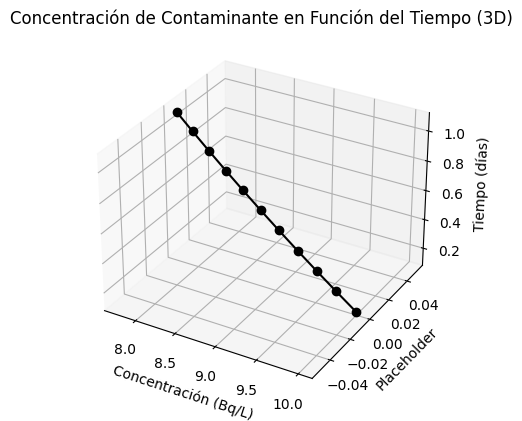

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Radioactivo:
    def __init__(self, c0, h, k, t0=0.1):
        self.c0 = c0  
        self.h = h    
        self.k = k   
        self.t0 = t0  
        self.c_values = [c0]
        self.t_values = [t0]

    def calculate_next(self):
        c_prev = self.c_values[-1]
        t_prev = self.t_values[-1]
        
        c_new = c_prev - self.k * self.h * c_prev
        t_new = t_prev + self.h

        self.c_values.append(c_new)
        self.t_values.append(t_new)

    def run_simulation(self, t_end):
        while self.t_values[-1] <= t_end:
            self.calculate_next()

    def get_results(self):
        data = {
            'Tiempo': np.array(self.t_values),
            'Concentración': np.array(self.c_values)
        }
        return pd.DataFrame(data)

    def plot_results(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        z = np.array(self.t_values)
        x = np.array(self.c_values)
        y = np.zeros_like(z)

        ax.plot(x, y, z, color='black', marker='o', linestyle='-')

        ax.set_title('Concentración de Contaminante en Función del Tiempo (3D)')
        ax.set_xlabel('Concentración (Bq/L)')
        ax.set_ylabel('Placeholder')
        ax.set_zlabel('Tiempo (días)')
        
        plt.show()

c0 = 10
h = 0.1
k = 0.25
t_end = 1.0

decay_model = Radioactivo(c0=c0, h=h, k=k)

decay_model.run_simulation(t_end=t_end)

resultados = decay_model.get_results()
print(resultados)

decay_model.plot_results()
